[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kjmobile/lb/blob/main/1_LM_Simple_Linear_to_Polynomial_Regression_ndarray.ipynb)

# From Simple Linear to Polynomial Regression (NumPy Array Version)

Now that you've learned regression with pandas DataFrames, let's do the same thing using **NumPy arrays**.

**Why learn the array version?**
- Many machine learning libraries work directly with arrays
- Arrays are faster for numerical computations
- Understanding arrays helps you work with any ML framework

**What's different?**
- We'll use `.values` to convert DataFrames to arrays
- Array indexing works differently: `X[:, 0]` instead of `X['Length']`
- We need to reshape 1D arrays to 2D for sklearn: `.reshape(-1, 1)`


## 1. Import Libraries

Same libraries as before!


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## 2. Load Data and Convert to Arrays

We'll start with a DataFrame, then convert to NumPy arrays.


In [11]:
# Load data as DataFrame
fish_df = pd.read_csv('https://raw.githubusercontent.com/kjmobile/data/refs/heads/main/ml/fish_l.csv')
fish_df.head()

,Species,Weight,Length,Height,Width
0,Bream,242.0,25.4,11.5200,4.0200
1,Bream,290.0,26.3,12.4800,4.3056
2,Bream,340.0,26.5,12.3778,4.6961
3,Bream,363.0,29.0,12.7300,4.4555
4,Bream,430.0,29.0,12.4440,5.1340


In [12]:
# Convert to NumPy arrays
fish_length = fish_df['Length'].values  # 1D array
fish_weight = fish_df['Weight'].values  # 1D array

In [13]:
print(f"Length: {fish_length.shape}")  # (159,) - 1D array with 159 elements
print(f"Weight: {fish_weight.shape}")  # (159,) - 1D array with 159 elements

Length: (159,)
Weight: (159,)


**Understanding array shapes:**
- `(159,)` means a 1D array with 159 elements
- `(159, 1)` means a 2D array with 159 rows and 1 column
- sklearn needs 2D arrays for features (X), but 1D is OK for targets (y)


### Split into Training and Test Sets

When splitting arrays, we get arrays back (not DataFrames).


In [14]:
# For sklearn, we need X to be 2D
X = fish_length.reshape(-1, 1)  # Convert 1D to 2D: (159,) -> (159, 1)
y = fish_weight                  # Keep y as 1D: (159,)

print(f"X shape after reshape: {X.shape}")  # (159, 1) - 2D array
print(f"y shape: {y.shape}")                 # (159,) - 1D array

X shape after reshape: (159, 1)
y shape: (159,)


In [15]:
# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)

print(f"\nTraining set: {len(train_X)} fish")
print(f"Test set: {len(test_X)} fish")


Training set: 119 fish
Test set: 40 fish


**Why `.reshape(-1, 1)`?**
- `-1` means "figure out this dimension automatically"
- `1` means we want 1 column
- So (159,) becomes (159, 1)

**Alternative ways to reshape:**
```python
X = fish_length.reshape(159, 1)  # Explicit
X = fish_length[:, np.newaxis]   # Add new axis
X = fish_length[:, None]         # Same as above
```


---
## 3. Simple Linear Regression with Arrays

The model training is identical! sklearn works the same with arrays.


In [16]:
# Create and train the model
model_linear = LinearRegression()
model_linear.fit(train_X, train_y)

# Check what the model learned
print(f"Slope (β₁): {model_linear.coef_[0]:.2f}")
print(f"Intercept (β₀): {model_linear.intercept_:.2f}")


Slope (β₁): 28.84
Intercept (β₀): -422.75


### Evaluate the Model


In [17]:
train_r2 = model_linear.score(train_X, train_y)
test_r2 = model_linear.score(test_X, test_y)

print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Training R²: 0.8221
Test R²: 0.8612


### Make a Prediction with Arrays

**Key difference:** We need to create a 2D array for prediction!


In [18]:
# Predict for a 60-inch fish
length_60 = np.array([[60]])  # 2D array: shape (1, 1)
predicted_weight = model_linear.predict(length_60)[0]

print(f"Input shape: {length_60.shape}")  # (1, 1)
print(f"A 60-inch fish should weigh approximately {predicted_weight:.2f} lbs")


Input shape: (1, 1)
A 60-inch fish should weigh approximately 1307.62 lbs


**Different ways to create the input:**
```python
length_60 = np.array([[60]])           # Method 1: nested list
length_60 = np.array([60]).reshape(1, 1)  # Method 2: reshape
length_60 = np.array([60]).reshape(-1, 1) # Method 3: auto dimension
```


### Visualize the Model


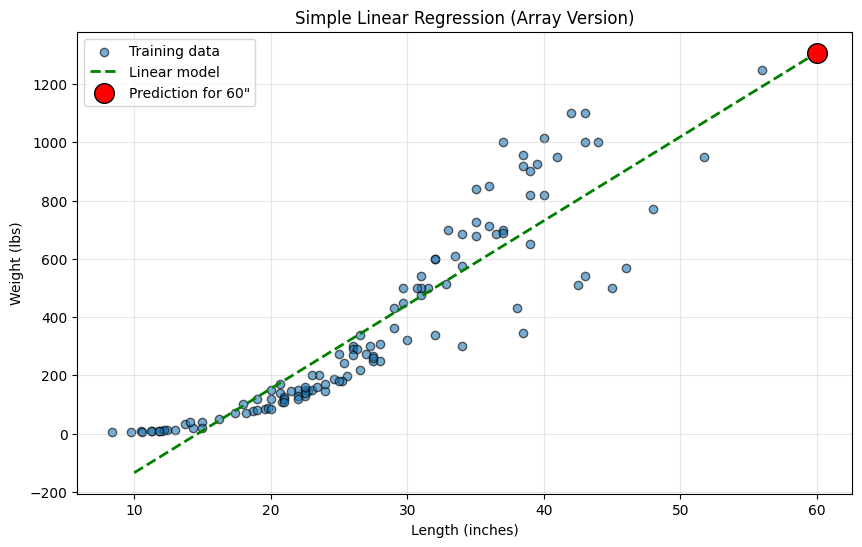

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(train_X, train_y, alpha=0.6, edgecolor='k', label='Training data')

# Draw the regression line
line_X = np.array([[10], [60]])  # 2D array with 2 points
plt.plot(line_X, model_linear.predict(line_X), 
         color='green', linewidth=2, linestyle='--', label='Linear model')

plt.scatter(60, predicted_weight, color='red', s=200, marker='o', 
           edgecolor='k', label='Prediction for 60"', zorder=5)

plt.xlabel('Length (inches)')
plt.ylabel('Weight (lbs)')
plt.title('Simple Linear Regression (Array Version)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


---
## 4. Polynomial Regression with Arrays

Here's where arrays get interesting! We need to manually create polynomial features.


### Create Polynomial Features

**With DataFrames:** We added a new column  
**With arrays:** We use `np.column_stack()` or `np.hstack()` to combine arrays


In [20]:
# Create Length² feature
train_X_squared = train_X ** 2  # Element-wise squaring
test_X_squared = test_X ** 2

print(f"Original train_X shape: {train_X.shape}")      # (119, 1)
print(f"Squared train_X shape: {train_X_squared.shape}")  # (119, 1)

# Combine Length² and Length into one array
train_X_poly = np.column_stack([train_X_squared, train_X])
test_X_poly = np.column_stack([test_X_squared, test_X])

print(f"\nPolynomial features shape: {train_X_poly.shape}")  # (119, 2)
print("\nFirst 5 rows of polynomial features:")
print(train_X_poly[:5])  # Show first 5 rows


Original train_X shape: (119, 1)
Squared train_X shape: (119, 1)

Polynomial features shape: (119, 2)

First 5 rows of polynomial features:
[[1075.84   32.8 ]
 [ 225.     15.  ]
 [ 576.     24.  ]
 [1296.     36.  ]
 [ 204.49   14.3 ]]


**Understanding `np.column_stack()`:**
- Takes a list of arrays: `[array1, array2]`
- Stacks them side-by-side as columns
- Result: a 2D array with multiple columns

**Alternative method using `np.hstack()`:**
```python
train_X_poly = np.hstack([train_X_squared, train_X])
```

**What does the array look like?**
- Column 0: Length² values
- Column 1: Length values
- Each row: one fish


### Train the Polynomial Model


In [21]:
model_poly = LinearRegression()
model_poly.fit(train_X_poly, train_y)

print(f"Coefficient for Length² (β₂): {model_poly.coef_[0]:.4f}")
print(f"Coefficient for Length (β₁): {model_poly.coef_[1]:.2f}")
print(f"Intercept (β₀): {model_poly.intercept_:.2f}")


Coefficient for Length² (β₂): 0.1829
Coefficient for Length (β₁): 18.31
Intercept (β₀): -290.02


### Evaluate the Polynomial Model


In [22]:
train_r2_poly = model_poly.score(train_X_poly, train_y)
test_r2_poly = model_poly.score(test_X_poly, test_y)

print(f"Training R²: {train_r2_poly:.4f}")
print(f"Test R²: {test_r2_poly:.4f}")
print(f"\n{'='*40}")
print("COMPARISON:")
print(f"{'='*40}")
print(f"Linear model test R²:     {test_r2:.4f}")
print(f"Polynomial model test R²: {test_r2_poly:.4f}")
print(f"Improvement:              {(test_r2_poly - test_r2):.4f}")


Training R²: 0.8271
Test R²: 0.8896

COMPARISON:
Linear model test R²:     0.8612
Polynomial model test R²: 0.8896
Improvement:              0.0284


### Make a Prediction with Arrays

For a 60-inch fish, we need BOTH Length² and Length!


In [23]:
# Create input: [Length², Length]
length_60_poly = np.array([[60**2, 60]])  # Shape: (1, 2)
predicted_weight_poly = model_poly.predict(length_60_poly)[0]

print(f"Input array: {length_60_poly}")
print(f"Input shape: {length_60_poly.shape}")  # (1, 2)
print(f"\nPolynomial model predicts: {predicted_weight_poly:.2f} lbs")
print(f"Linear model predicts:     {predicted_weight:.2f} lbs")
print(f"Difference:                {abs(predicted_weight_poly - predicted_weight):.2f} lbs")


Input array: [[3600   60]]
Input shape: (1, 2)

Polynomial model predicts: 1466.95 lbs
Linear model predicts:     1307.62 lbs
Difference:                159.33 lbs


**Breaking down the input:**
```python
length_60_poly = np.array([[60**2, 60]])
                           ↑       ↑
                        Length²  Length
```
- `60**2 = 3600` (Length²)
- `60` (Length)
- Shape must be (1, 2) because we trained on 2 features


### Visualize the Polynomial Model


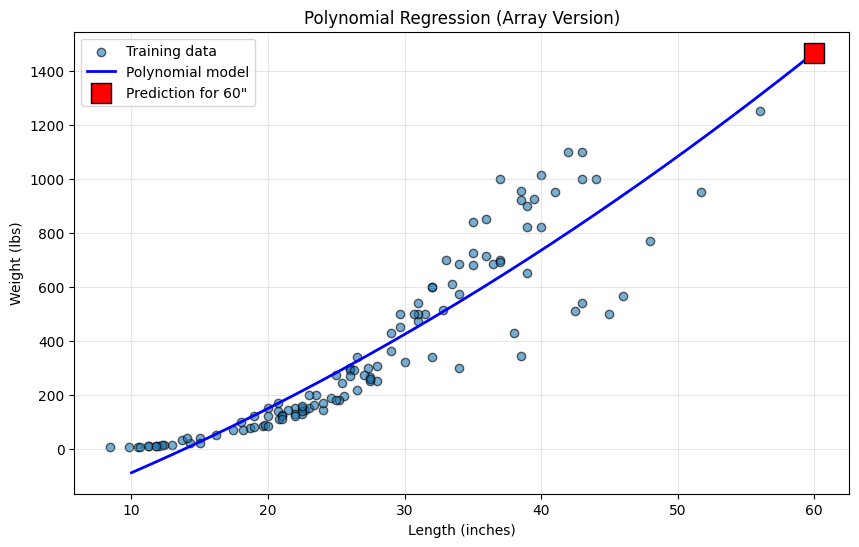

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(train_X, train_y, alpha=0.6, edgecolor='k', label='Training data')

# Draw the curved line
lengths = np.linspace(10, 60, 300)  # 300 points between 10 and 60
# Calculate predictions manually using the equation
predictions = model_poly.coef_[0] * lengths**2 + model_poly.coef_[1] * lengths + model_poly.intercept_
plt.plot(lengths, predictions, color='blue', linewidth=2, label='Polynomial model')

plt.scatter(60, predicted_weight_poly, color='red', s=200, marker='s', 
           edgecolor='k', label='Prediction for 60"', zorder=5)

plt.xlabel('Length (inches)')
plt.ylabel('Weight (lbs)')
plt.title('Polynomial Regression (Array Version)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


---
## 5. Side-by-Side Comparison


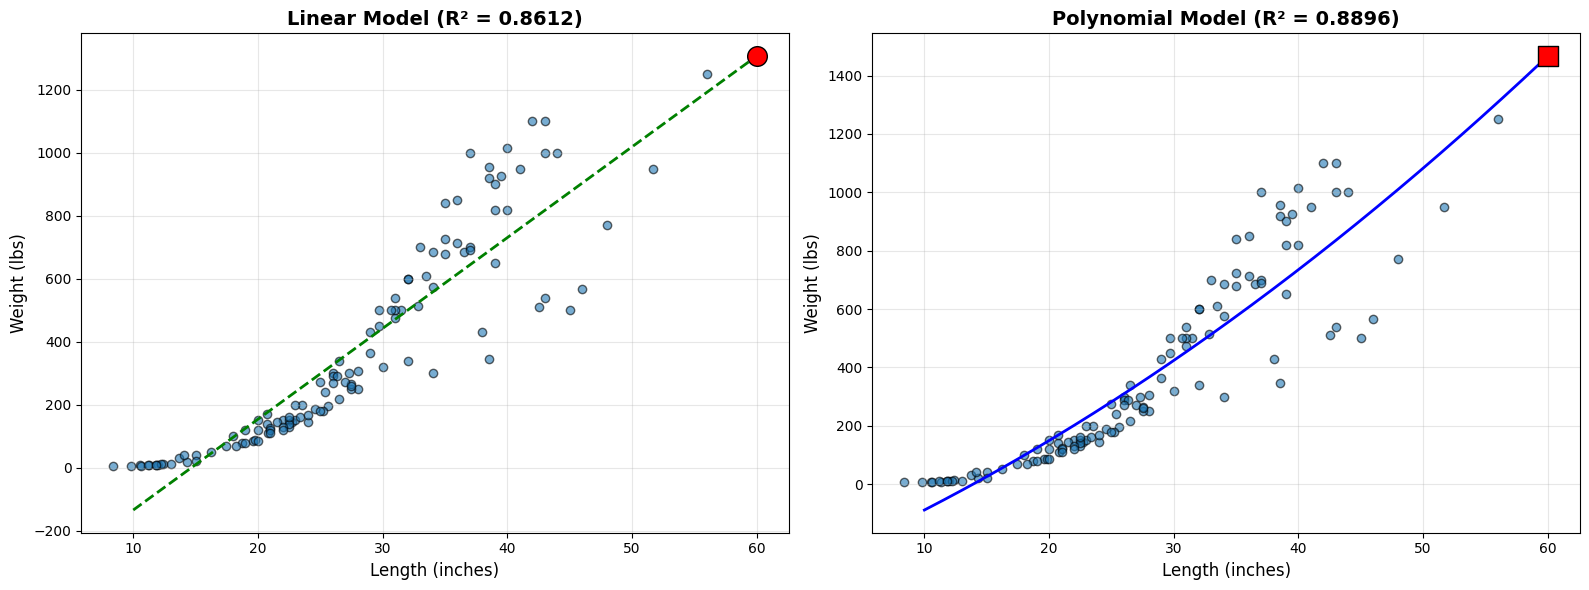

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Linear Regression
axes[0].scatter(train_X, train_y, alpha=0.6, edgecolor='k')
line_X = np.array([[10], [60]])
axes[0].plot(line_X, model_linear.predict(line_X), 
            color='green', linewidth=2, linestyle='--')
axes[0].scatter(60, predicted_weight, color='red', s=200, marker='o', edgecolor='k', zorder=5)
axes[0].set_xlabel('Length (inches)', fontsize=12)
axes[0].set_ylabel('Weight (lbs)', fontsize=12)
axes[0].set_title(f'Linear Model (R² = {test_r2:.4f})', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Polynomial Regression
axes[1].scatter(train_X, train_y, alpha=0.6, edgecolor='k')
lengths = np.linspace(10, 60, 300)
predictions = model_poly.coef_[0] * lengths**2 + model_poly.coef_[1] * lengths + model_poly.intercept_
axes[1].plot(lengths, predictions, color='blue', linewidth=2)
axes[1].scatter(60, predicted_weight_poly, color='red', s=200, marker='s', edgecolor='k', zorder=5)
axes[1].set_xlabel('Length (inches)', fontsize=12)
axes[1].set_ylabel('Weight (lbs)', fontsize=12)
axes[1].set_title(f'Polynomial Model (R² = {test_r2_poly:.4f})', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


---
## 6. Key Differences: DataFrame vs Array

| Aspect | DataFrame | NumPy Array |
|--------|-----------|-------------|
| **Column access** | `df['Length']` | `X[:, 0]` |
| **Shape for sklearn** | Already 2D | Need `.reshape(-1, 1)` |
| **Add features** | `df['Length²'] = df['Length']**2` | `np.column_stack([X², X])` |
| **Prediction input** | `pd.DataFrame({'Length': [60]})` | `np.array([[60]])` |
| **Column names** | Yes, easy to read | No, must track manually |
| **Speed** | Slower for computation | Faster for computation |

**When to use which?**
- **DataFrames**: Data exploration, readability, mixed data types
- **Arrays**: Production code, speed, pure numerical computation


---
## Try It Yourself!

**Challenge 1:** Change the `random_state` to 42 and see if the R² scores change.

**Challenge 2:** Create a cubic model using arrays. You'll need to stack three arrays: [Length³, Length², Length]

**Challenge 3:** Explain this array indexing code:
```python
first_fish = train_X[0, 0]      # What does this get?
first_10_fish = train_X[:10, 0]  # What about this?
all_lengths = train_X[:, 0]      # And this?
```


---


#### Challenge 1: Change random_state to 42


In [1]:
# Your code here



#### Challenge 2: Create a Cubic Model with Arrays

**Hint:** You'll need to create three arrays and stack them:
```python
train_X_cubic = np.column_stack([train_X**3, train_X**2, train_X])
```


In [ ]:
# Your code here
# Challenge 2: Cubic model with arrays, extend the following code
train_X_cubic = np.column_stack([train_X**3, train_X**2, train_X])
test_X_cubic = np.column_stack([test_X**3, test_X**2, test_X])








#### Challenge 3: Array Indexing Explanation

Explain what each line does:
```python
first_fish = train_X[0, 0]      # ?
first_10_fish = train_X[:10, 0] # ?
all_lengths = train_X[:, 0]     # ?
```


In [ ]:
# print the three variables created above




---
## Summary

1. **Converting DataFrames to arrays** using `.values`
2. **Reshaping arrays** with `.reshape(-1, 1)` for sklearn
3. **Creating polynomial features** with `np.column_stack()`
4. **Array indexing** with `[row, column]` notation
5. **Why arrays matter** - they're fundamental to ML


